In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


In [ ]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [ ]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

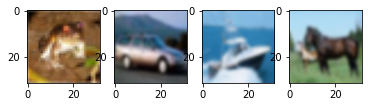

In [ ]:
plt.subplot(141)
plt.imshow(X_train[0])
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

In [ ]:
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)

for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])

for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


In [ ]:
from tensorflow.keras.utils import to_categorical
batchSize = 512            #-- Training Batch Size
num_classes = 10           #-- Number of classes in CIFAR-10 dataset
num_epochs = 50            #-- Number of epochs for training   
learningRate= 0.001        #-- Learning rate for the network
lr_weight_decay = 0.95     #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows = 32              #-- input image dimensions
img_cols = 32 

Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

In [ ]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
Y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.metrics import top_k_categorical_accuracy

In [ ]:
dropout = 0.5

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'top_k_categorical_accuracy'])

with tf.device('/GPU:0'):
  hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=32, verbose=2)
  scores = model.evaluate(X_test, Y_test, verbose=0)
  print(scores)

Epoch 1/30
1563/1563 - 10s - loss: 1.4095 - accuracy: 0.5099 - top_k_categorical_accuracy: 0.9252 - val_loss: 1.0221 - val_accuracy: 0.6368 - val_top_k_categorical_accuracy: 0.9649
Epoch 2/30
1563/1563 - 9s - loss: 0.9696 - accuracy: 0.6581 - top_k_categorical_accuracy: 0.9690 - val_loss: 0.8975 - val_accuracy: 0.6797 - val_top_k_categorical_accuracy: 0.9780
Epoch 3/30
1563/1563 - 9s - loss: 0.8424 - accuracy: 0.7062 - top_k_categorical_accuracy: 0.9769 - val_loss: 0.7116 - val_accuracy: 0.7499 - val_top_k_categorical_accuracy: 0.9856
Epoch 4/30
1563/1563 - 9s - loss: 0.7593 - accuracy: 0.7345 - top_k_categorical_accuracy: 0.9825 - val_loss: 0.6996 - val_accuracy: 0.7522 - val_top_k_categorical_accuracy: 0.9837
Epoch 5/30
1563/1563 - 9s - loss: 0.7025 - accuracy: 0.7529 - top_k_categorical_accuracy: 0.9845 - val_loss: 0.6609 - val_accuracy: 0.7723 - val_top_k_categorical_accuracy: 0.9861
Epoch 6/30
1563/1563 - 9s - loss: 0.6515 - accuracy: 0.7725 - top_k_categorical_accuracy: 0.9875 - 

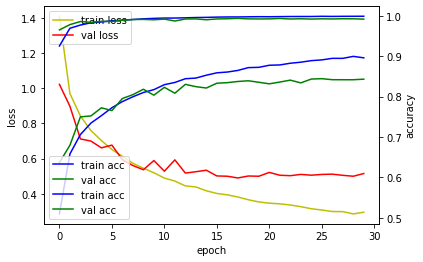

In [ ]:
fig, loss_ax = plt.subplots()
 
acc_ax = loss_ax.twinx()
 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

acc_ax.plot(hist.history['top_k_categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_top_k_categorical_accuracy'], 'g', label='val acc')
 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax. set_ylabel('accuracy')
 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
 
plt.show()